# POCS Dataset

## Data loading


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, pearsonr
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

In [84]:
import pandas as pd

# Define the full path to the file
file_path = r"C:\Users\lenovo\Downloads\Data for the final project of Data Mining\pcos_dataset.csv"

# Read the CSV file
df_pcos = pd.read_csv(file_path)

# Show the first few rows
df_pcos.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [85]:
df_pcos.describe().loc[["min", "max"]].transpose()

,min,max
Age,18.0,45.0
BMI,18.1,35.0
Menstrual_Irregularity,0.0,1.0
Testosterone_Level(ng/dL),20.0,99.8
Antral_Follicle_Count,5.0,29.0
PCOS_Diagnosis,0.0,1.0


## Data exploration

In [86]:
print(df_pcos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None


In [87]:
# Check for missing values
print(df_pcos.isnull().sum()) 

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64


In [88]:
print("\nDescriptive Statistics")
display(df_pcos.describe(include='all'))


Descriptive Statistics


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [89]:
# Count unique values in each column
unique_counts =df_pcos.nunique()
print("\nUnique Values Count:\n", unique_counts)


Unique Values Count:
 Age                           28
BMI                          170
Menstrual_Irregularity         2
Testosterone_Level(ng/dL)    577
Antral_Follicle_Count         25
PCOS_Diagnosis                 2
dtype: int64


In [90]:
duplicates = df_pcos[df_pcos.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicated rows: 0
Empty DataFrame
Columns: [Age, BMI, Menstrual_Irregularity, Testosterone_Level(ng/dL), Antral_Follicle_Count, PCOS_Diagnosis]
Index: []


In [91]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df_pcos['PCOS_Diagnosis'].value_counts(normalize=True))



Target Variable Distribution:
0    0.801
1    0.199
Name: PCOS_Diagnosis, dtype: float64


In [92]:
# Count of each age value in the dataset
df_pcos['Age'].value_counts().sort_index()


18    49
19    33
20    44
21    32
22    43
23    26
24    36
25    33
26    31
27    29
28    21
29    39
30    34
31    25
32    31
33    38
34    43
35    28
36    36
37    34
38    38
39    37
40    37
41    33
42    36
43    50
44    30
45    54
Name: Age, dtype: int64

In [93]:
# Grouped statistics for each Diagnosis group
group_stats_df = df_pcos.groupby('PCOS_Diagnosis').agg(['mean', 'median', 'std'])

display(group_stats_df)


Age                         BMI                   \
                     mean median       std       mean median       std   
PCOS_Diagnosis                                                           
0               32.043695   33.0  8.491280  25.457928   24.7  4.894031   
1               30.673367   30.0  8.280978  30.126633   30.2  2.929792   

               Menstrual_Irregularity                   \
                                 mean median       std   
PCOS_Diagnosis                                           
0                            0.413233    0.0  0.492722   
1                            1.000000    1.0  0.000000   

               Testosterone_Level(ng/dL)                    \
                                    mean median        std   
PCOS_Diagnosis                                               
0                              57.842447   56.8  23.729169   
1                              69.485930   68.5  17.949148   

               Antral_Follicle_Count                   
                                mean median       std  
PCOS_Diagnosis                                         
0                          16.792759   17.0  7.261164  
1                          20.190955   20.0  5.460947

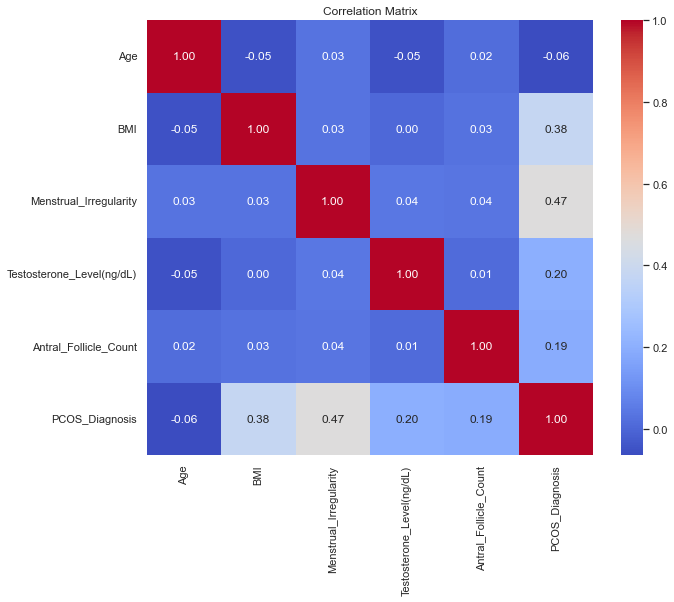


Correlation with Diagnosis:
 PCOS_Diagnosis               1.000000
Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64


In [94]:
# -------------------------------
# Correlation Analysis
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df_pcos.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with 'Diagnosis'
diagnosis_corr = corr['PCOS_Diagnosis'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", diagnosis_corr)

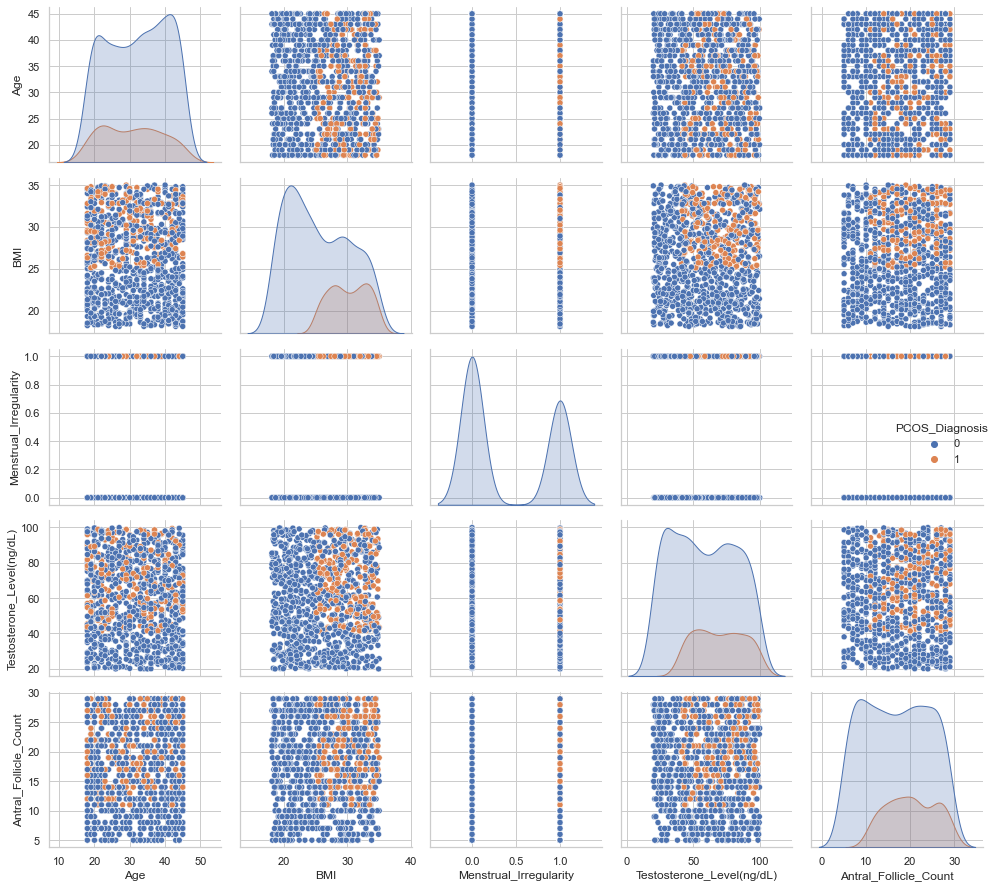

In [95]:
sns.set(style="whitegrid")
pairplot_fig = sns.pairplot(df_pcos, hue="PCOS_Diagnosis", diag_kind='kde')
pairplot_fig.fig.tight_layout()
plt.show()

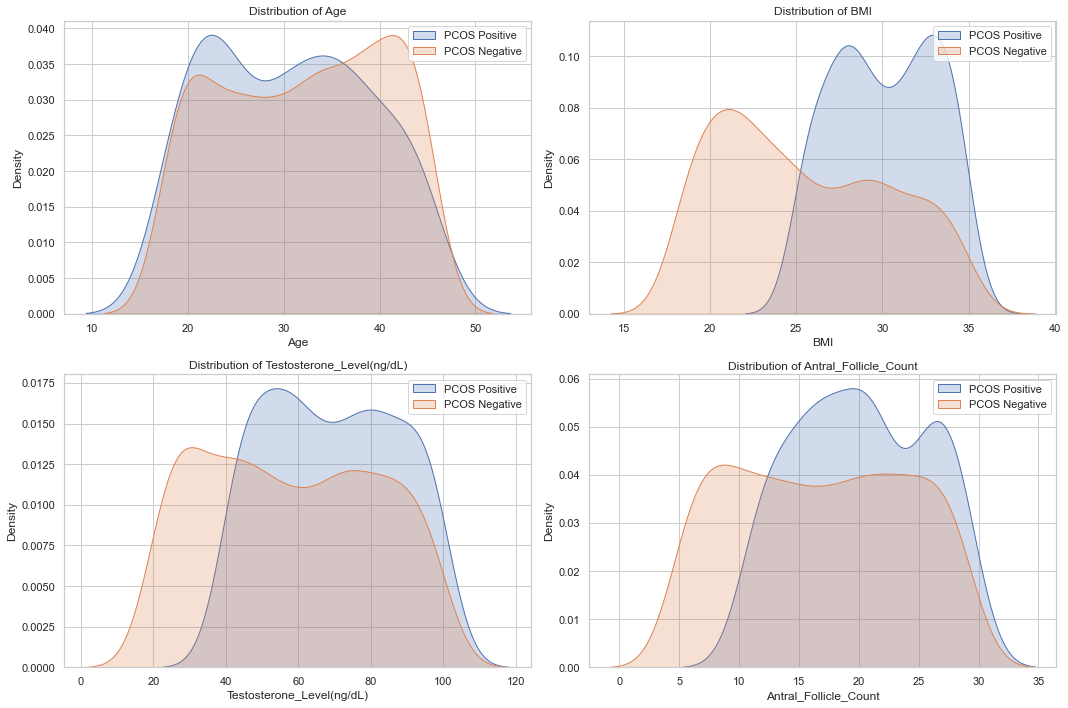

In [96]:
# Distribution Analysis
features_to_plot = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(df_pcos[df_pcos['PCOS_Diagnosis'] == 1][feature], label='PCOS Positive', shade=True)
    sns.kdeplot(df_pcos[df_pcos['PCOS_Diagnosis'] == 0][feature], label='PCOS Negative', shade=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()



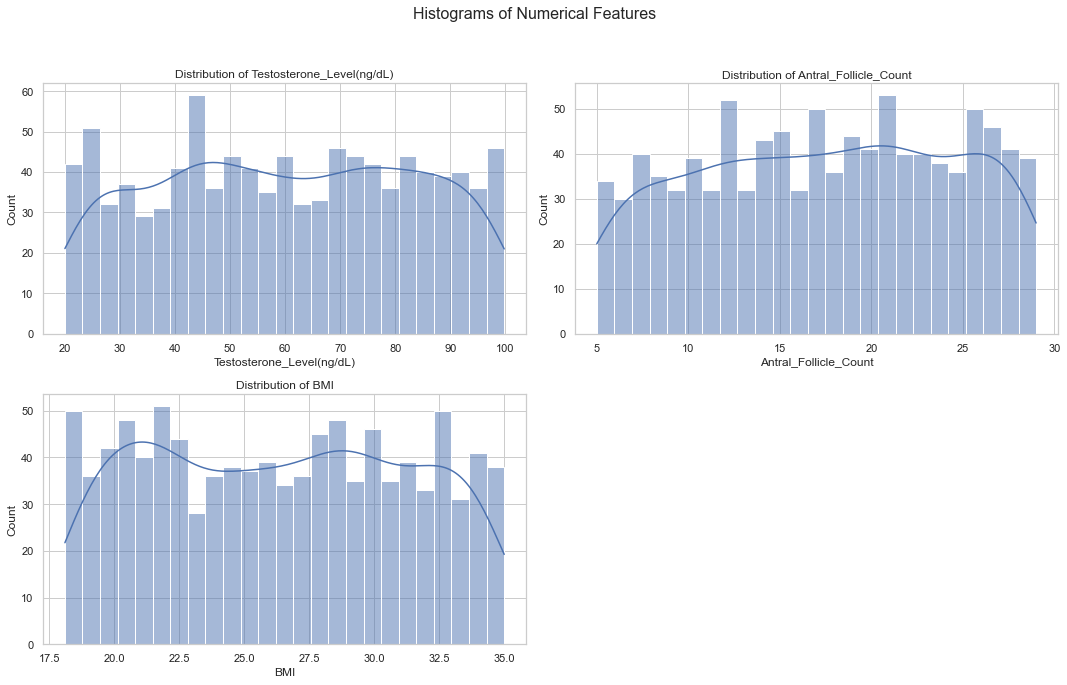

In [97]:
# Histograms for Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
for i, col in enumerate(['Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_pcos[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

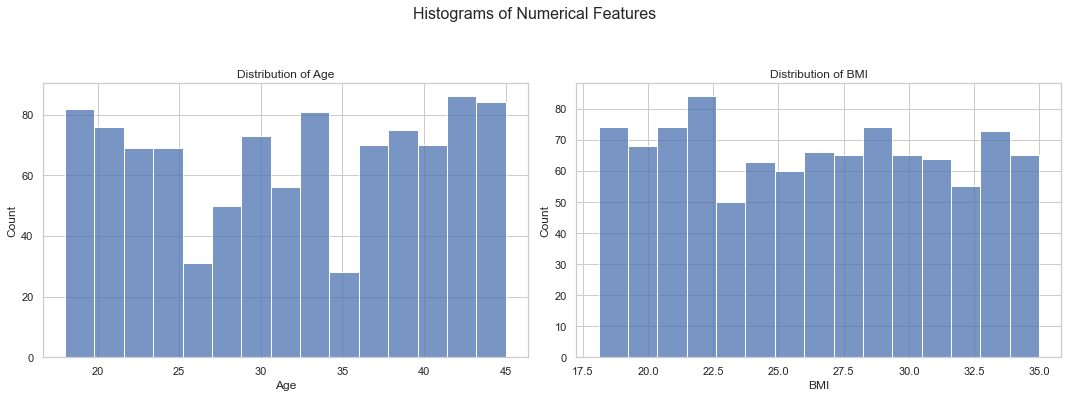

In [98]:
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)

for i, col in enumerate(['Age', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_pcos[col], bins=15, kde=False)
    plt.title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

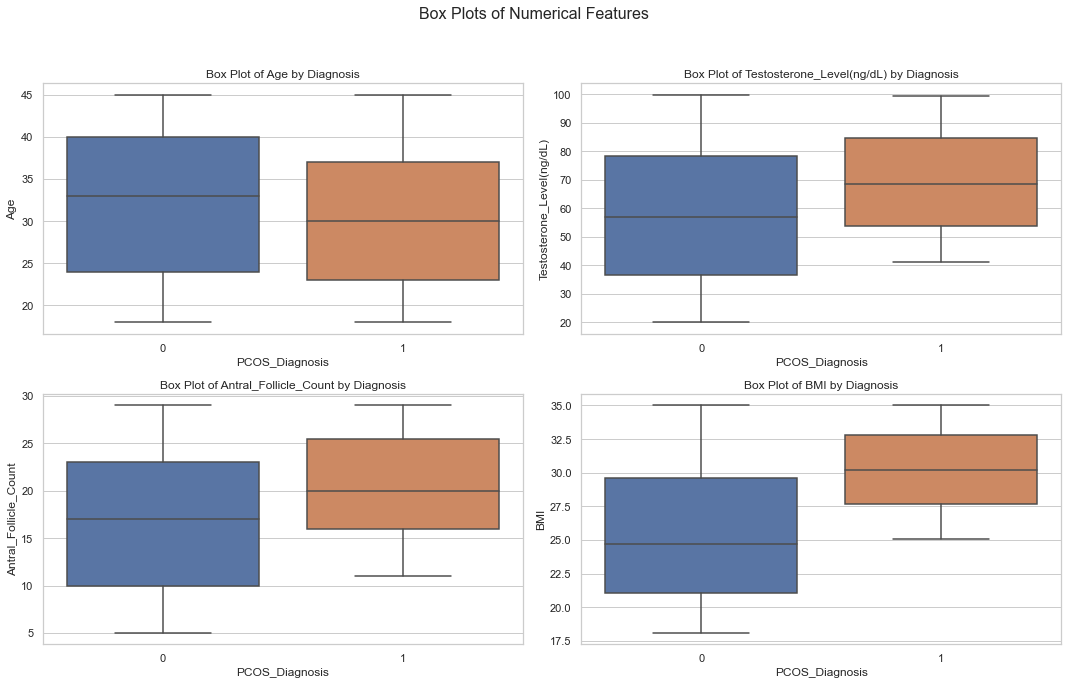

In [99]:
# Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
for i, col in enumerate(['Age', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='PCOS_Diagnosis', y=col, data=df_pcos)
    plt.title(f'Box Plot of {col} by Diagnosis')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

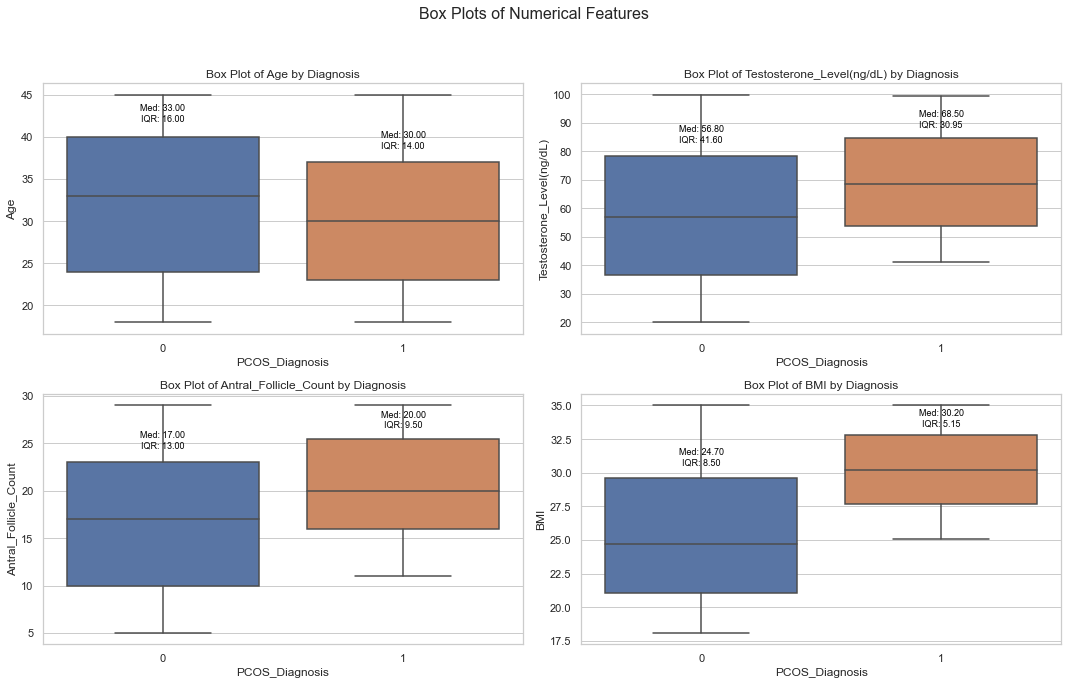

In [100]:
plt.figure(figsize=(15, 10))
plt.suptitle('Box Plots of Numerical Features', fontsize=16)

numerical_cols = ['Age', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'BMI']

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    ax = sns.boxplot(x='PCOS_Diagnosis', y=col, data=df_pcos)
    plt.title(f'Box Plot of {col} by Diagnosis')

    # Calculate median and IQR for each diagnosis group
    for group in [0, 1]:
        group_data = df_pcos[df_pcos['PCOS_Diagnosis'] == group][col]
        median = group_data.median()
        q1 = group_data.quantile(0.25)
        q3 = group_data.quantile(0.75)
        iqr = q3 - q1

        # Add text annotation on the plot
        ax.text(group, q3 + 0.1 * iqr, f'Med: {median:.2f}\nIQR: {iqr:.2f}', 
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

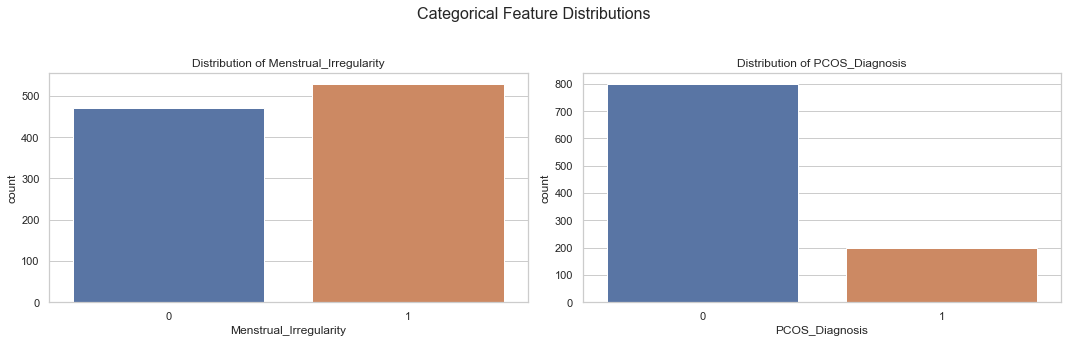

In [101]:
# Categorical Feature Distributions
plt.figure(figsize=(15, 5))
plt.suptitle('Categorical Feature Distributions', fontsize=16)
for i, col in enumerate(['Menstrual_Irregularity', 'PCOS_Diagnosis']):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, data=df_pcos)
    plt.title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

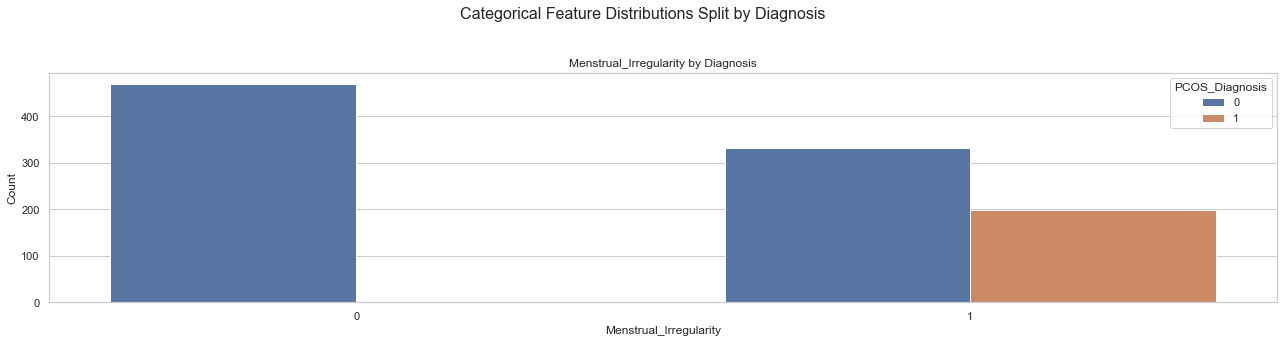

In [102]:
categorical_features = ['Menstrual_Irregularity']

plt.figure(figsize=(18, 5))
plt.suptitle('Categorical Feature Distributions Split by Diagnosis', fontsize=16)

for i, col in enumerate(categorical_features):
    plt.subplot(1, 1, i + 1)
    sns.countplot(x=col, hue='PCOS_Diagnosis', data=df_pcos)
    plt.title(f'{col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

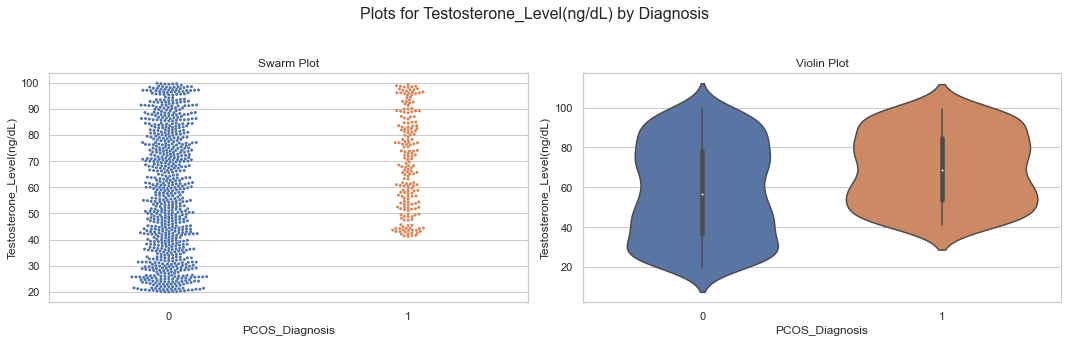

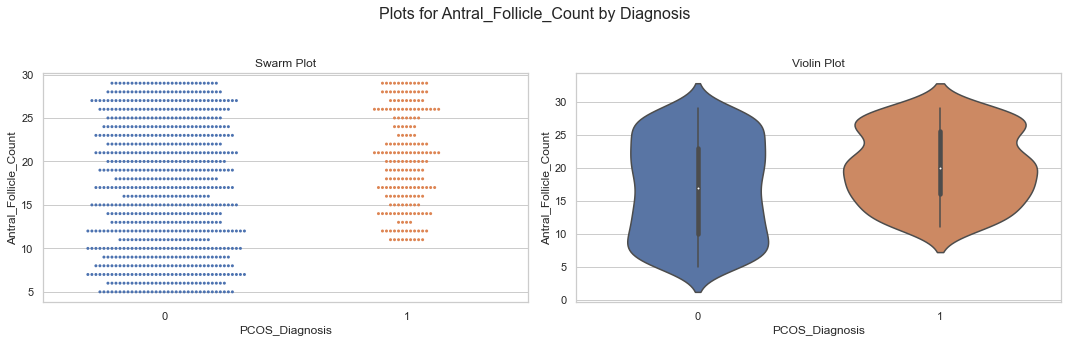

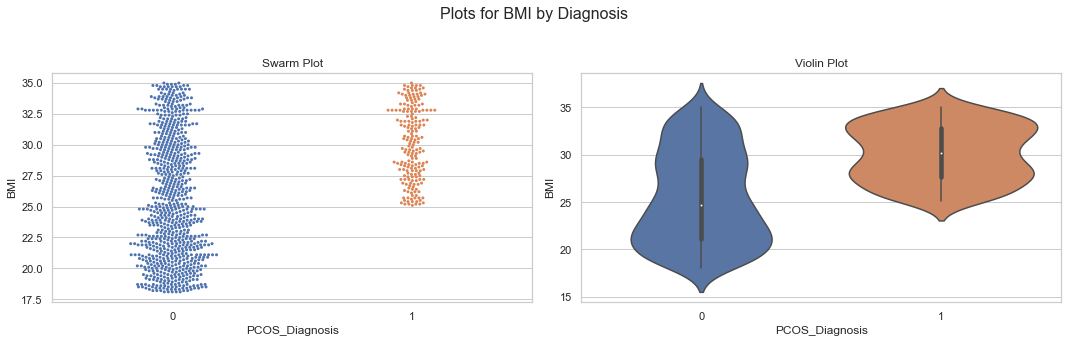

In [103]:
# Strip Plots, Swarm Plots, and Violin Plots for Numerical Features
numerical_features = ['Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'BMI']
for col in numerical_features:
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Plots for {col} by Diagnosis', fontsize=16)

    plt.subplot(1, 2, 1)
    sns.swarmplot(x='PCOS_Diagnosis', y=col, data=df_pcos, size=3)
    plt.title('Swarm Plot')

    plt.subplot(1, 2, 2)
    sns.violinplot(x='PCOS_Diagnosis', y=col, data=df_pcos)
    plt.title('Violin Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

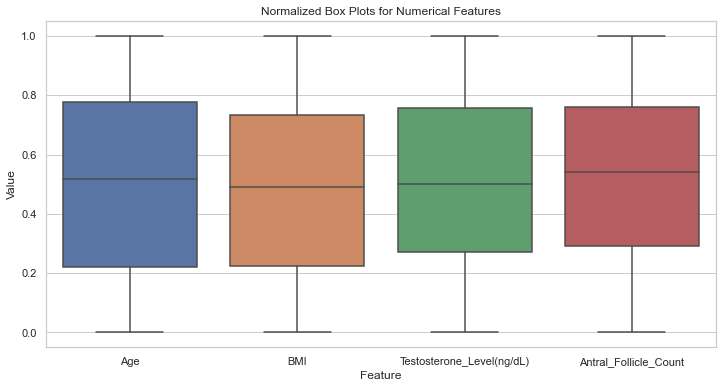

In [104]:
# Select numerical columns
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_pcos[numerical_features])
df_normalized = pd.DataFrame(normalized_data, columns=numerical_features)

# Melt for plotting
df_melted = df_normalized.melt(var_name='Feature', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Normalized Box Plots for Numerical Features')
plt.show()

## Data analysis

In [105]:
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']

# Pearson Correlation
print("Pearson Correlation with Diagnosis:")
for col in numerical_features:
    correlation, p_value = pearsonr(df_pcos[col], df_pcos['PCOS_Diagnosis'])
    print(f"  {col} vs. Diagnosis: correlation = {correlation:.4f}, p-value = {p_value:.4f}")

# Chi-Squared Test for Categorical Features
print("\nChi-Squared Tests for Categorical Features:")
categorical_features = ['Menstrual_Irregularity']
for col in categorical_features:
    contingency_table = pd.crosstab(df_pcos[col], df_pcos['PCOS_Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"  {col} vs. Diagnosis: p-value = {p:.4f}")

# T-Tests for Numerical Features
print("\n Independent T-Tests for Numerical Features:")
for col in numerical_features:
    group0 = df_pcos[df_pcos['PCOS_Diagnosis'] == 0][col]
    group1 = df_pcos[df_pcos['PCOS_Diagnosis'] == 1][col]
    t_statistic, p_value = ttest_ind(group0, group1)
    print(f"  {col} vs. Diagnosis: p-value = {p_value:.4f}")



Pearson Correlation with Diagnosis:
  Age vs. Diagnosis: correlation = -0.0647, p-value = 0.0409
  BMI vs. Diagnosis: correlation = 0.3779, p-value = 0.0000
  Testosterone_Level(ng/dL) vs. Diagnosis: correlation = 0.2008, p-value = 0.0000
  Antral_Follicle_Count vs. Diagnosis: correlation = 0.1920, p-value = 0.0000

Chi-Squared Tests for Categorical Features:
  Menstrual_Irregularity vs. Diagnosis: p-value = 0.0000

 Independent T-Tests for Numerical Features:
  Age vs. Diagnosis: p-value = 0.0409
  BMI vs. Diagnosis: p-value = 0.0000
  Testosterone_Level(ng/dL) vs. Diagnosis: p-value = 0.0000
  Antral_Follicle_Count vs. Diagnosis: p-value = 0.0000


## Model Traning

###  Model Traning - with 10-fold cross-validation only and without balancing the y target

In [126]:

categorical_features = ['Menstrual_Irregularity'] 
numerical_features= ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}


metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


results = {}


n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index].copy(), X.iloc[test_index].copy() 
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # --- SCALING INSIDE THE LOOP ---
        scaler = StandardScaler()
        X_train_fold[numerical_features] = scaler.fit_transform(X_train_fold[numerical_features])
        X_test_fold[numerical_features] = scaler.transform(X_test_fold[numerical_features])
        # --- END SCALING ---

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_fold)[:, 1]
        else: 
            y_prob = model.decision_function(X_test_fold) 

        # Calculate metrics for the current fold
        model_scores['accuracy'].append(accuracy_score(y_test_fold, y_pred))
        model_scores['precision'].append(precision_score(y_test_fold, y_pred, zero_division=0))
        model_scores['recall'].append(recall_score(y_test_fold, y_pred, zero_division=0))   
        model_scores['f1'].append(f1_score(y_test_fold, y_pred, zero_division=0))       
        model_scores['roc_auc'].append(roc_auc_score(y_test_fold, y_prob))
        confusion_matrices.append(confusion_matrix(y_test_fold, y_pred))

   
    results[model_name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[model_name]['confusion_matrix'] = np.mean(confusion_matrices, axis=0)



print("\nModel Comparison (Mean scores across 10 folds):")
comparison_df = pd.DataFrame(results).T
print(comparison_df)


print("\nAverage Confusion Matrices (across 10 folds):")
for model_name, result in results.items():
   
    print(f"\n{model_name}:\n{result['confusion_matrix'].astype(int) if isinstance(result['confusion_matrix'], np.ndarray) else result['confusion_matrix']}")

Training and evaluating KNeighborsClassifier...
Training and evaluating DecisionTreeClassifier...
Training and evaluating RandomForestClassifier...
Training and evaluating GradientBoostingClassifier...

Model Comparison (Mean scores across 10 folds):
                           accuracy precision    recall        f1   roc_auc  \
KNeighborsClassifier          0.962  0.901093   0.91124  0.904875  0.988244   
DecisionTreeClassifier        0.999       1.0  0.995652  0.997778  0.997826   
RandomForestClassifier        0.999       1.0  0.995652  0.997778       1.0   
GradientBoostingClassifier    0.999       1.0  0.995652  0.997778  0.998899   

                                      confusion_matrix  
KNeighborsClassifier        [[78.1, 2.0], [1.8, 18.1]]  
DecisionTreeClassifier      [[80.1, 0.0], [0.1, 19.8]]  
RandomForestClassifier      [[80.1, 0.0], [0.1, 19.8]]  
GradientBoostingClassifier  [[80.1, 0.0], [0.1, 19.8]]  

Average Confusion Matrices (across 10 folds):

KNeighborsClassifier

###  Model Traning - with 10-fold cross-validation only and with balancing the y target

In [107]:

X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']



scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled_np = np.array(X_resampled)
y_resampled_np = np.array(y_resampled)

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []


for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_resampled_np, y_resampled_np):
        X_train, X_test = X_resampled_np[train_idx], X_resampled_np[test_idx]
        y_train, y_test = y_resampled_np[train_idx], y_resampled_np[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })


results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Gradient Boosting,0.999379,1.00000,0.99875,0.999371,0.999985
2,Random Forest,0.998129,1.00000,0.99625,0.998105,1.000000
1,Decision Tree,0.996879,1.00000,0.99375,0.996807,0.996875
0,KNN,0.962535,0.93518,0.99500,0.963933,0.991907


In [108]:

X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Evaluate models with SMOTE inside CV loop
for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE only on training fold
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Final comparison
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Decision Tree,0.999,1.000000,0.995,0.997436,0.997500
2,Random Forest,0.999,1.000000,0.995,0.997436,1.000000
3,Gradient Boosting,0.999,1.000000,0.995,0.997436,1.000000
0,KNN,0.949,0.811248,0.985,0.887340,0.986681


###  Model Traning - with 10-fold cross-validation And SelectKBest K=2

In [109]:

X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']



scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual_info_classif:")
print(selected_features)

base_models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[
        ('knn', base_models['KNN']),
        ('rf', base_models['Random Forest']),
        ('gb', base_models['Gradient Boosting'])
    ],
    voting='soft'
)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Evaluation with SMOTE inside CV loop
for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to training data only
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Final results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Selected features based on mutual_info_classif:
Index(['BMI', 'Menstrual_Irregularity'], dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
3,Gradient Boosting,0.884,0.643716,0.955000,0.767652,0.926106
0,KNN,0.876,0.645751,0.875000,0.739545,0.921495
2,Random Forest,0.870,0.641264,0.814211,0.715348,0.921286
1,Decision Tree,0.848,0.617512,0.634211,0.623641,0.879693


###  Model Traning - with 10-fold cross-validation And SelectKBest K=3

In [110]:

X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual_info_classif:")
print(selected_features)

base_models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[
        ('knn', base_models['KNN']),
        ('rf', base_models['Random Forest']),
        ('gb', base_models['Gradient Boosting'])
    ],
    voting='soft'
)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Evaluation with SMOTE inside CV loop
for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to training data only
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Final results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Selected features based on mutual_info_classif:
Index(['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)'], dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,0.954,0.835845,0.975000,0.896837,0.980061
3,Gradient Boosting,0.954,0.834756,0.975000,0.896699,0.977016
0,KNN,0.944,0.796557,0.990000,0.878939,0.971992
1,Decision Tree,0.938,0.840438,0.864737,0.847742,0.910547


###  Model Traning - with 10-fold cross-validation And SelectKBest K=4

In [111]:


X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(score_func=mutual_info_classif, k=4)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual_info_classif:")
print(selected_features)


base_models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[
        ('knn', base_models['KNN']),
        ('rf', base_models['Random Forest']),
        ('gb', base_models['Gradient Boosting'])
    ],
    voting='soft'
)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Evaluation with SMOTE inside CV loop
for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to training data only
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Final results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Selected features based on mutual_info_classif:
Index(['BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count'],
      dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Decision Tree,0.999,1.000000,0.995,0.997436,0.997500
2,Random Forest,0.999,1.000000,0.995,0.997436,1.000000
3,Gradient Boosting,0.999,1.000000,0.995,0.997436,1.000000
0,KNN,0.955,0.830921,0.975,0.896327,0.988753


###  Model Traning - with 10-fold cross-validation And SelectKBest K=5

In [112]:

X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']

categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual_info_classif:")
print(selected_features)


base_models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(
    estimators=[
        ('knn', base_models['KNN']),
        ('rf', base_models['Random Forest']),
        ('gb', base_models['Gradient Boosting'])
    ],
    voting='soft'
)

models = base_models.copy()
models['Voting Ensemble'] = voting_clf

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# Evaluation with SMOTE inside CV loop
for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply SMOTE to training data only
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Final results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

Selected features based on mutual_info_classif:
Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count'],
      dtype='object')


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Decision Tree,0.999,1.000000,0.995,0.997436,0.997500
2,Random Forest,0.999,1.000000,0.995,0.997436,1.000000
3,Gradient Boosting,0.999,1.000000,0.995,0.997436,1.000000
4,Voting Ensemble,0.999,1.000000,0.995,0.997436,1.000000
0,KNN,0.949,0.811248,0.985,0.887340,0.986681


Selected features based on mutual_info_classif:
Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count'],
      dtype='object')

Model Performance Summary:
               Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
1      Decision Tree     0.999   1.000000   0.995  0.997436  0.997500
2      Random Forest     0.999   1.000000   0.995  0.997436  1.000000
3  Gradient Boosting     0.999   1.000000   0.995  0.997436  1.000000
4    Voting Ensemble     0.999   1.000000   0.995  0.997436  1.000000
0                KNN     0.949   0.811248   0.985  0.887340  0.986681

Random Forest Feature Importance Table:
                     Feature  Importance
2     Menstrual_Irregularity    0.379727
1                        BMI    0.327794
3  Testosterone_Level(ng/dL)    0.161068
4      Antral_Follicle_Count    0.123867
0                        Age    0.007544


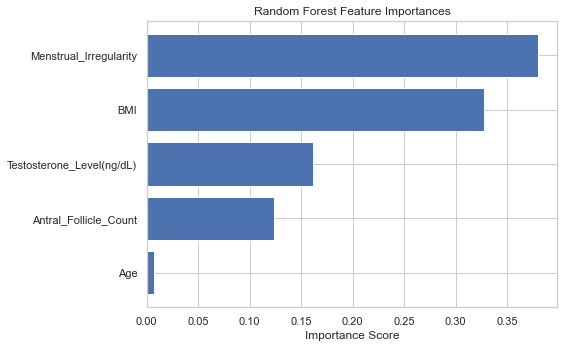

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = df_pcos.drop(columns=['PCOS_Diagnosis'])
y = df_pcos['PCOS_Diagnosis']


categorical_features = ['Menstrual_Irregularity']
numerical_features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features based on mutual_info_classif:")
print(selected_features)


base_models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

voting_clf = VotingClassifier(
    estimators=[
        ('knn', base_models['KNN']),
        ('rf', base_models['Random Forest']),
        ('gb', base_models['Gradient Boosting'])
    ],
    voting='soft'
)

models = base_models.copy()
models['Voting Ensemble'] = voting_clf


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []

    for train_idx, test_idx in cv.split(X_selected, y):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })


results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Summary:")
print(results_df)


smote = SMOTE(random_state=42)
X_res_final, y_res_final = smote.fit_resample(X_selected, y)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_res_final, y_res_final)

importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print("\nRandom Forest Feature Importance Table:")
print(feat_imp_df)


plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [120]:
# 2.4.1 Model Training - 10-fold CV without balancing
results_10_Fold = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.961, 0.999, 0.999, 0.999],
    'Precision': [0.896357, 1.000000, 1.000000, 1.000000],
    'Recall': [0.911240, 0.995652, 0.995652, 0.995652],
    'F1 Score': [0.902446, 0.997778, 0.997778, 0.997778],
    'ROC AUC': [0.986023, 0.997826, 1.000000, 0.998899]
}

# 2.4.1 Model Training - 10-fold CV with balancing
results_10_Fold_Balanced = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.962535, 0.996879, 0.998129, 0.999379],
    'Precision': [0.93518, 1.00000, 1.00000, 1.00000],
    'Recall': [0.99500, 0.99375, 0.99625, 0.99875],
    'F1 Score': [0.963933, 0.996807, 0.998105, 0.999371],
    'ROC AUC': [0.991907, 0.996875, 1.000000, 0.999985]
}

# 2.4.3 Model Training - 10-fold CV with SelectKBest K=2
results_k2 = {
    'Model': ['Gradient Boosting', 'Voting Ensemble', 'KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [0.884, 0.880, 0.876, 0.870, 0.848],
    'Precision': [0.643716, 0.646607, 0.645751, 0.641264, 0.617512],
    'Recall': [0.955000, 0.905000, 0.875000, 0.814211, 0.634211],
    'F1 Score': [0.767652, 0.751786, 0.739545, 0.715348, 0.623641],
    'ROC AUC': [0.926106, 0.923100, 0.921495, 0.921286, 0.879693]
}

# 2.4.4 Model Training - 10-fold CV with SelectKBest K=3
results_k3 = {
    'Model': ['Voting Ensemble', 'Random Forest', 'Gradient Boosting', 'KNN', 'Decision Tree'],
    'Accuracy': [0.957, 0.954, 0.954, 0.944, 0.938],
    'Precision': [0.834076, 0.835845, 0.834756, 0.796557, 0.840438],
    'Recall': [0.995000, 0.975000, 0.975000, 0.990000, 0.864737],
    'F1 Score': [0.904817, 0.896837, 0.896699, 0.878939, 0.847742],
    'ROC AUC': [0.980718, 0.980061, 0.977016, 0.971992, 0.910547]
}

# 2.4.5 Model Training - 10-fold CV with SelectKBest K=4
results_k4 = {
    'Model': ['Voting Ensemble', 'Gradient Boosting', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [0.999, 0.999, 0.999, 0.955, 0.999],
    'Precision': [1.000000, 1.000000, 1.000000, 0.830921, 1.000000],
    'Recall': [0.995, 0.995, 0.995, 0.975, 0.995],
    'F1 Score': [0.997436, 0.997436, 0.997436, 0.896327, 0.997436],
    'ROC AUC': [0.999875, 1.000000, 1.000000, 0.988753, 0.997500]
}

# 2.4.6 Model Training - 10-fold CV with SelectKBest K=5
results_k5 = {
    'Model': ['Voting Ensemble', 'Random Forest', 'KNN', 'Gradient Boosting', 'Decision Tree'],
    'Accuracy': [0.999, 0.999, 0.949, 0.999, 0.999],
    'Precision': [1.000000, 1.000000, 0.811248, 1.000000, 1.000000],
    'Recall': [0.995, 0.995, 0.985, 0.995, 0.995],
    'F1 Score': [0.997436, 0.997436, 0.887340, 0.997436, 0.997436],
    'ROC AUC': [1.000000, 1.000000, 0.986681, 1.000000, 0.997500]
}

# Convert to DataFrames
dfs = {
    '10_Fold': pd.DataFrame(results_10_Fold),
    '10_Fold_Balanced': pd.DataFrame(results_10_Fold_Balanced),
    'K=3': pd.DataFrame(results_k3),
    'K=4': pd.DataFrame(results_k4),
    'K=5': pd.DataFrame(results_k5),
}

# Add config type to distinguish later
for name, df in dfs.items():
    df['Config'] = name

# Combine all into a single DataFrame
full_df = pd.concat(dfs.values())
full_df.set_index(['Config', 'Model'], inplace=True)
full_df = full_df.reset_index()


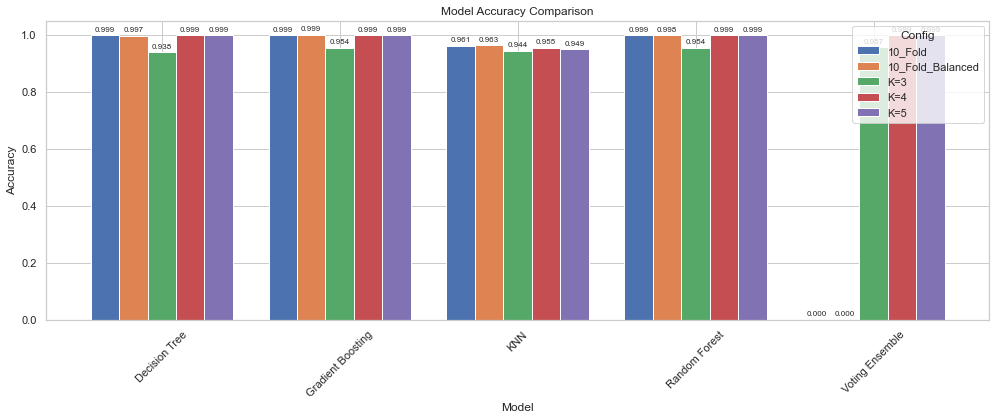

In [121]:
metric = 'Accuracy'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

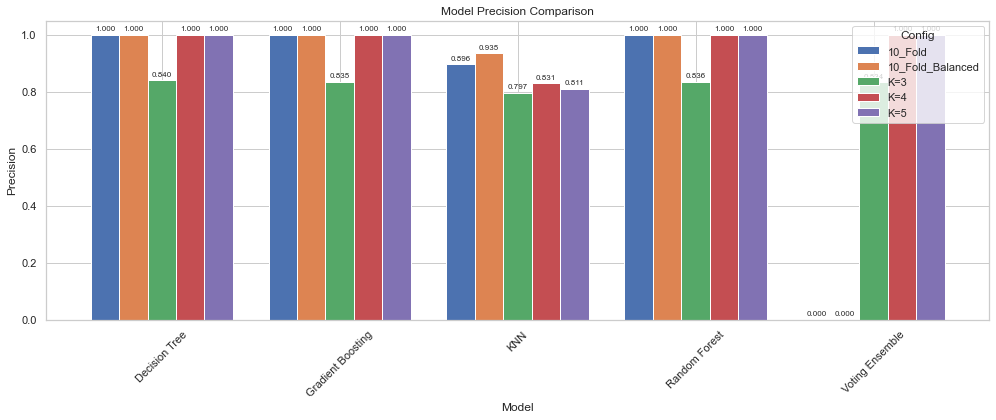

In [122]:
metric = 'Precision'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Precision Comparison')
ax.set_ylabel('Precision')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

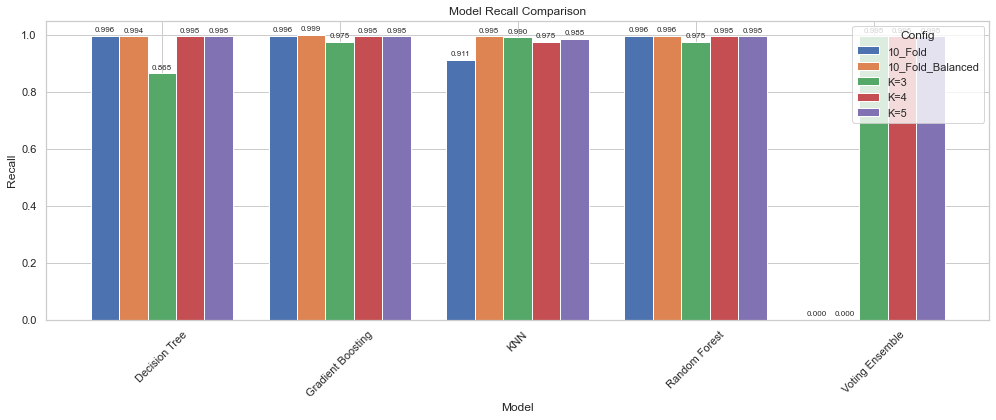

In [123]:
metric = 'Recall'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Recall Comparison')
ax.set_ylabel('Recall')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


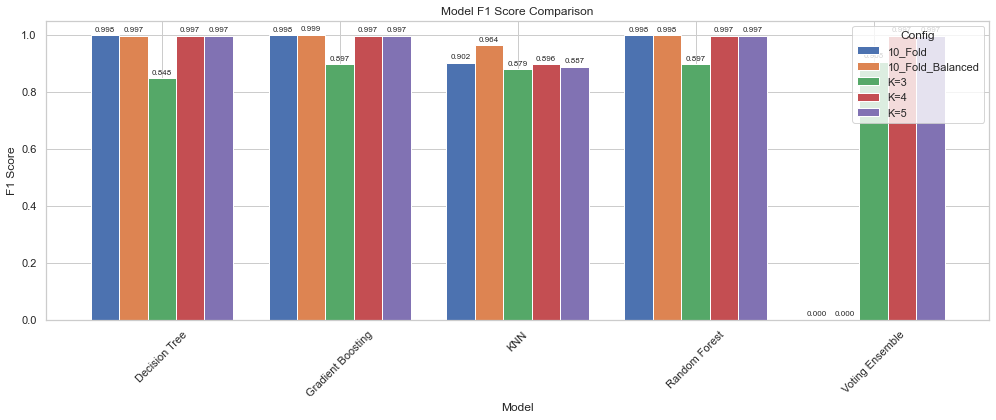

In [124]:
metric = 'F1 Score'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model F1 Score Comparison')
ax.set_ylabel('F1 Score')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

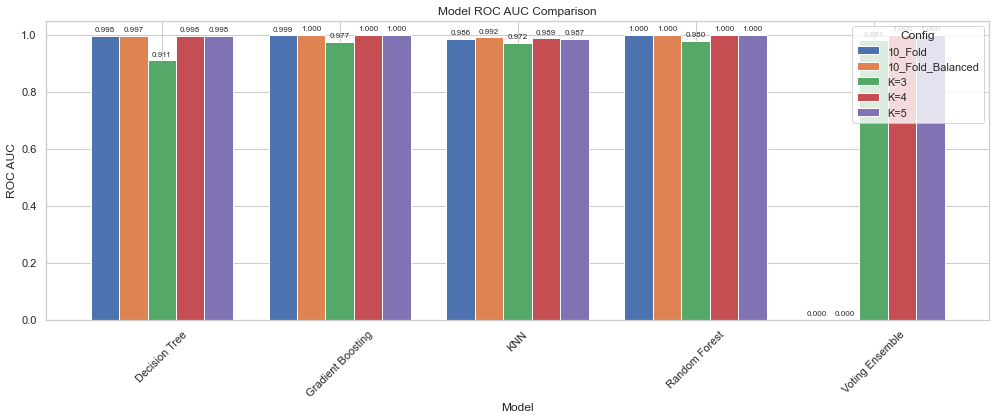

In [125]:
metric = 'ROC AUC'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model ROC AUC Comparison')
ax.set_ylabel('ROC AUC')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()
